In [1]:
import numpy as np
import matplotlib.pyplot as plt
#iradon
from skimage.transform import iradon
# median_filter
from scipy.ndimage import median_filter
from toor.TORFilesReader import ToRFile
from toor.AnalyticalReconstruction import AnalyticalReconstruction

In [2]:
# import file
output_path = "C:\\Users\\pedro\\OneDrive\\Ambiente de Trabalho\\all_values.tor"
output_path = r"D:\Pedro\listmode_wirephantom.tor"
output_path = r"E:\simulatedsinogram_matrix.tor"
ToRFile_reader = ToRFile(filepath=output_path)
ToRFile_reader.read()
listModeBody_read = ToRFile_reader.fileBodyData
print(listModeBody_read)

Reading file: E:\simulatedsinogram_matrix.tor
ListModeBody with 44505380 events


In [34]:
# listModeBody_read =listModeBody_read[:100000]
# print(listModeBody_read)
# random_index = np.random.randint(0, len(listModeBody_read), 10000000)
# listModeBody_read.setListmode(listModeBody_read.listmode[random_index,:])
# listModeBody_read.setCountsPerGlobalID()

In [3]:
energyregion = "59.6"
_indexEnergyRegion = ToRFile_reader.calibrations.systemSensitivity.fields.index(energyregion)
energyMask = (listModeBody_read["ENERGYB"] <=
                  ToRFile_reader.calibrations.systemSensitivity.energyWindows[_indexEnergyRegion][1]) & (
                             listModeBody_read["ENERGYB"] >=
                             ToRFile_reader.calibrations.systemSensitivity.energyWindows[_indexEnergyRegion][0])
listModeBody_read.setListmode(listModeBody_read.listmode[energyMask], regenerateStats=True) 
print(listModeBody_read)

Field: ENERGYA
...............................
Mean: 0.0
Std: 0.0
Range: 0.0 to 0.0
Median: 0.0
Min diff: None
Number of unique values: 1
-------------------------------

Field: ENERGYB
...............................
Mean: 56.6888
Std: 7.3968
Range: 40.0 to 69.99999
Median: 57.23442
Min diff: 0.0001
Number of unique values: 801999
-------------------------------

Field: IDA
...............................
Mean: 0.0
Std: 0.0
Range: 0.0 to 0.0
Median: 0.0
Min diff: None
Number of unique values: 1
-------------------------------

Field: IDB
...............................
Mean: 15.5001
Std: 9.1183
Range: 0.0 to 31.0
Median: 16.0
Min diff: 1.0
Number of unique values: 32
-------------------------------

Field: AXIAL_MOTOR
...............................
Mean: -179.0928
Std: 103.9066
Range: -358.2 to -0.0
Median: -178.2
Min diff: 1.8
Number of unique values: 200
-------------------------------

Field: FAN_MOTOR
...............................
Mean: -0.0074
Std: 32.8113
Range: -54.0 to 54.0

(array([25096., 25690., 25896., 26092., 25803., 26475., 25528., 23919.,
        25746., 25140., 25502., 25219., 25897., 25317., 25439., 26061.,
        25920., 26099., 26117., 26008., 26819., 25566., 25949., 26825.,
        26416., 25636., 26947., 27112., 25527., 26434., 25506., 26835.,
        25644., 26340., 26605., 26966., 26162., 26762., 27125., 26648.,
        28161., 28171., 26378., 27662., 27830., 28025., 27944., 27800.,
        27111., 26229., 27528., 27096., 27889., 27912., 28804., 29280.,
        28739., 28213., 29500., 29110., 28718., 29653., 29003., 30107.,
        30689., 30087., 30749., 30361., 29235., 29952., 30305., 30112.,
        30427., 29519., 30392., 31370., 31123., 31260., 31052., 32036.,
        31956., 31929., 31960., 33137., 32743., 32330., 32480., 34416.,
        33758., 32983., 34526., 33526., 34261., 33734., 34281., 35635.,
        35629., 36187., 35376., 35900., 36627., 37405., 36650., 37267.,
        36479., 36284., 37602., 36780., 38481., 37459., 38844., 

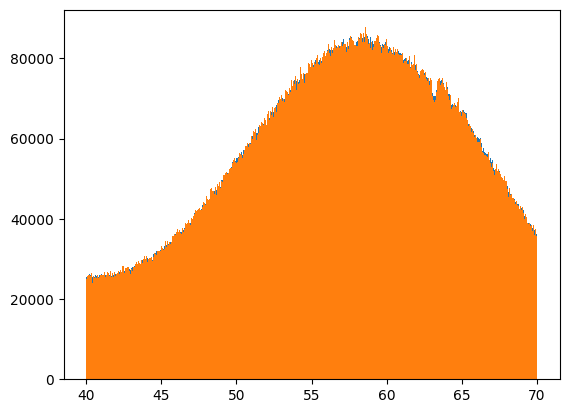

In [4]:
# listModeBody_read.setCountsPerGlobalID(listModeBody_read.countsPerGlobalID[listModeBody_read["IDB"]==16])
plt.hist(listModeBody_read["ENERGYB"], bins=500)
# 
even_mask = listModeBody_read["IDB"] % 2 ==0
odd_mask = listModeBody_read["IDB"] % 2 != 0
listModeBody_read["IDB"][even_mask] +=1
listModeBody_read["IDB"][odd_mask] -=1



# listModeBody_read.setCountsPerGlobalID()
listModeBody_read.setListModeHistogramHybridMode()
plt.hist(listModeBody_read["ENERGYB"], bins=500, weights=listModeBody_read.countsPerGlobalID)
# listModeBody_read.setListmode(listModeBody_read.listmode[listModeBody_read["IDB"]==16])

In [36]:
geometry = ToRFile_reader.systemInfo
# geometry.xRayProducer.setFocalSpotInitialPositionWKSystem([12.55, 0, 0])
geometry.sourcePositionAfterMovement(listModeBody_read["AXIAL_MOTOR"], listModeBody_read["FAN_MOTOR"])

geometry.detectorSideBCoordinatesAfterMovement(listModeBody_read["AXIAL_MOTOR"], listModeBody_read["FAN_MOTOR"], listModeBody_read["IDB"].astype(np.int32))

Calculating source position for all events detected...
Calculating parametric positions of the center and vertices of the detector for all events...
Centroid calculated for all events...
Vertice 0 calculated for all events...
Vertice 1 calculated for all events...
Vertice 2 calculated for all events...
Vertice 3 calculated for all events...
Vertice 4 calculated for all events...
Vertice 5 calculated for all events...
Vertice 6 calculated for all events...
Vertice 7 calculated for all events...
[[[ -5.069092   49.685806  -18.24     ]
  [-23.457172   73.38985   -18.24     ]
  [-25.038158   72.16353   -18.24     ]
  ...
  [-23.457172   73.38985   -15.96     ]
  [-25.038158   72.16353   -15.96     ]
  [ -6.6509476  48.458878  -15.96     ]]

 [[ -6.62726    49.50207   -18.24     ]
  [-25.750826   72.61682   -18.24     ]
  [-27.292517   71.341446  -18.24     ]
  ...
  [-25.750826   72.61682   -15.96     ]
  [-27.292517   71.341446  -15.96     ]
  [ -8.169794   48.22606   -15.96     ]]

 [[ -

(array([[512., 525., 464., ..., 442., 462.,   2.],
        [503., 547., 488., ..., 502., 538., 492.],
        [507., 521., 486., ..., 524., 509., 490.],
        ...,
        [524., 518., 592., ..., 527., 514., 557.],
        [468., 535., 512., ..., 542., 510., 509.],
        [474., 491., 512., ..., 511., 514., 535.]]),
 array([-358.2  , -356.409, -354.618, -352.827, -351.036, -349.245,
        -347.454, -345.663, -343.872, -342.081, -340.29 , -338.499,
        -336.708, -334.917, -333.126, -331.335, -329.544, -327.753,
        -325.962, -324.171, -322.38 , -320.589, -318.798, -317.007,
        -315.216, -313.425, -311.634, -309.843, -308.052, -306.261,
        -304.47 , -302.679, -300.888, -299.097, -297.306, -295.515,
        -293.724, -291.933, -290.142, -288.351, -286.56 , -284.769,
        -282.978, -281.187, -279.396, -277.605, -275.814, -274.023,
        -272.232, -270.441, -268.65 , -266.859, -265.068, -263.277,
        -261.486, -259.695, -257.904, -256.113, -254.322, -252.531,

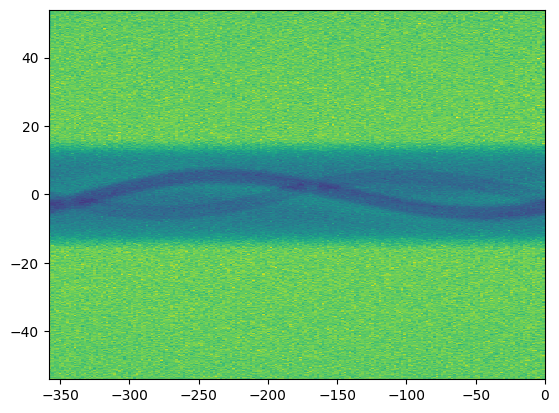

In [37]:
# plt.hist2d(listModeBody_read["AXIAL_MOTOR"], listModeBody_read["FAN_MOTOR"], bins=(200,2991))
plt.hist2d(listModeBody_read["AXIAL_MOTOR"], listModeBody_read["FAN_MOTOR"], bins=(200,481), weights=listModeBody_read.countsPerGlobalID)


[[29.985197  29.940802  29.86686   ... 29.940802  29.985197  30.       ]
 [ 0.9423228  1.8837156  2.8232493 ... -1.8837156 -0.9423228 -0.       ]
 [ 0.         0.         0.        ...  0.         0.         0.       ]]
23413
8181


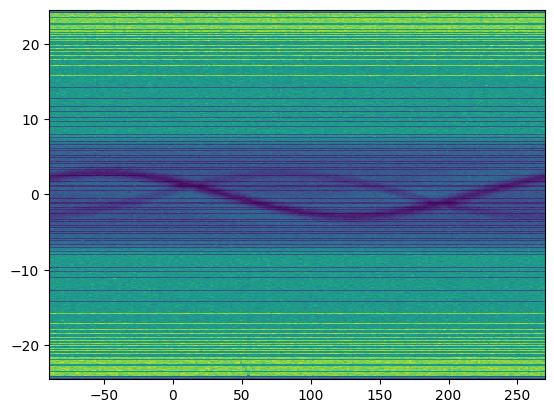

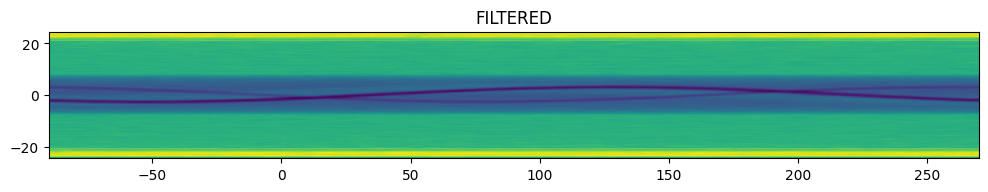

In [38]:
print(geometry._originSystemWK)
midpointFace = (geometry._verticesB[:,7] + geometry._verticesB[:,0]) / 2
analytical=AnalyticalReconstruction(initial_points=geometry.sourceCenter, end_points=geometry.centerFace, rebinning="reb")
number_bins_s =len(np.unique(analytical.sinoClass.s))


number_bins_phi =len(np.unique(analytical.sinoClass.phi))
print(number_bins_phi)
print(number_bins_s)
sino=analytical.sinoClass.projected_sinogram(bins_x=200, bins_y=481, rebining_x=1, rebining_y=1, weights=listModeBody_read.countsPerGlobalID)
sino_filtered = median_filter(sino[0], 5)
# sino_filtered = sino_filtered[:,80:-80]
# analytical.FBP2D()

plt.figure(figsize=(12,6))
plt.title("FILTERED")

plt.imshow(sino_filtered.T, extent=[sino[1].min(), sino[1].max(), sino[2].min(), sino[2].max()])
#sino_new=sino[0].T
#sino_new=sino_new[9:51,:]
#k=0.25*np.ones([3,3])
#sino_new=signal.convolve(sino[0].T,k,mode='same',)
#im=iradon(sino[0].T, theta=sino[1][:-1], circle=True,
#       filter_name="ramp",
#       output_size=int(sino[0].shape[1]))

#
# im=iradon_sart(sino[0].T, theta=sino[1][:-1])
# im=analytical.im
theta = np.arange(0,360,1.8)
im=iradon(sino_filtered.T, theta=theta, circle=True,
       filter_name="ramp",
       output_size=int(np.ceil(sino[0].shape[1]*0.7)))


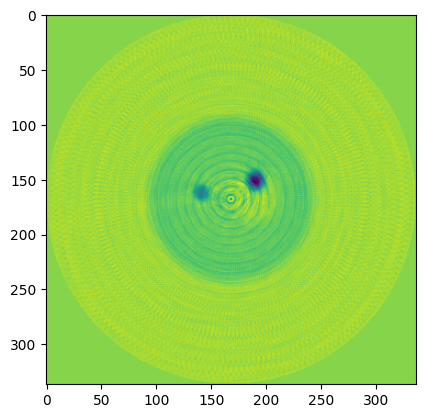

In [39]:
plt.imshow(im)

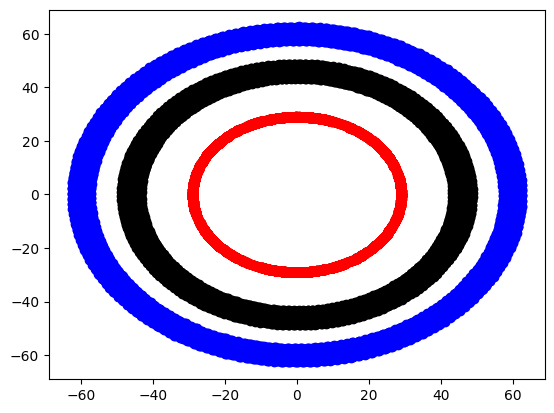

In [11]:
plt.plot(geometry.sourceCenter[:10000,0], geometry.sourceCenter[:10000,1], "ro")
plt.plot(geometry.centerFace[:10000,0], geometry.centerFace[:10000,1], "bo")
# plt.plot(geometry._originSystemWK.T[::10000,0], geometry._originSystemWK.T[::10000,1], "go")
plt.plot(geometry._verticesB[:10000,3,0], geometry._verticesB[:10000,3,1], "ko")

In [ ]:
xi = geometry.sourceCenter[:,0]
yi = geometry.sourceCenter[:,1]
xf = midpointFace[:,0]
yf = midpointFace[:,1]


p1 = np.column_stack((xi, yi))
p2 = np.column_stack((xf, yf))
p3 = np.copy(p1) * 0

# phi = phi%360
v1 = p1 - p2
v2 = p2 - p3
n1 = (np.sqrt(v1[:, 0] ** 2 + v1[:, 1] ** 2))

abcissa = (xf - xi)
declive = np.zeros(abcissa.shape)
declive[abcissa != 0] = (yf - yi)[abcissa != 0] / abcissa[abcissa != 0]


# phi[np.sign(xi - xf) == -1] += 180
# phi[np.sign(xi - xf) == -1] *= -1
#
# cross_product = np.cross(v1, v2)
phi = np.degrees(np.arctan(declive))
# phi[np.sign(yi - yf) == -1] += 180

sign_vector = np.sign(np.cross(v1, v2))

# norm_cross_v1_v2 = np.sqrt(cross_product_v1_v2[:, 0] ** 2 + cross_product_v1_v2[:, 1] ** 2)
# sign = cross_product_v1_v2/norm_cross_v1_v2

norm_cross_product = np.array(v1[:, 0] ** 2 + v1[:, 1] ** 2)
dot_pro = p1[:, 0] * v1[:, 0] + p1[:, 1] * v1[:, 1]
t = -dot_pro / norm_cross_product
Q = (p1.T + (t * v1.T)).T
mask_non_zero = Q[:, 0] != 0
phi = np.ones_like(Q[:, 0])*90
phi[mask_non_zero] = np.degrees(np.arctan(Q[mask_non_zero, 1] / Q[mask_non_zero, 0]))
phi[np.sign(yi - yf) == -1] *= -1
s = np.sqrt(Q[:, 0] ** 2 + Q[:, 1] ** 2) *sign_vector
# s = np.sqrt(Q[:, 0] ** 2 + Q[:, 1] ** 2)

In [ ]:
bins_x=200
bins_y=400
s_max = np.abs(s).max()

min_s = -s_max
max_s = s_max
# min_s = s.min()
# max_s = s.max()
max_phi = phi.max()
min_phi = phi.min()
min_z = np.zeros(2)



_projected_sinogram = plt.hist2d(phi, s, bins=[bins_x, bins_y],
                                              range=[[min_phi, max_phi],
                                                     [min_s, max_s]])

# theta = np.arange(0,180,1.8)
theta = np.linspace(0, 180, num=bins_x)
sino_filtered = median_filter(_projected_sinogram[0], 5)
# sino_filtered = sino_filtered[:,80:-80]
plt.figure()
plt.imshow(sino_filtered.T, extent=[_projected_sinogram[1][0], _projected_sinogram[1][-1], _projected_sinogram[2][0], _projected_sinogram[2][-1]] )
im=iradon(sino_filtered.T, theta=theta, circle=True,
       filter_name="hann",
       output_size=int(np.ceil(_projected_sinogram[0].shape[1])*0.7))
plt.figure()
plt.imshow(im, cmap='gray', )

In [ ]:
plt.figure()
for i in range(geometry._verticesB.shape[1]):
    plt.plot(geometry._verticesB[0,i,1], geometry._verticesB[0,i,2],"o" ,label=i)
    
plt.plot(midpointFace[0,1], midpointFace[0,2], "ro", label="midpointFace")
plt.legend()

plt.figure()
for j in range(geometry._verticesB.shape[1]):
    plt.plot(geometry._verticesB[0,j,0], geometry._verticesB[0,j,1],"o" ,label=j)

plt.plot(midpointFace[0,0], midpointFace[0,1], "ro", label="midpointFace")

In [ ]:
plt.figure()
plt.imshow(im, cmap='gray')